### 08-3. 합성곱 신경망의 시각화 #####

##### 1) 가중치 시각화 #####

In [20]:
from tensorflow import keras

model = keras.models.load_model("best-cnn-model.h5")

In [21]:
# 모델의 층

model.layers

In [22]:
# 첫번째 합성곱 층의 가중치

conv = model.layers[0] # 가중치 크기
conv.weights[0].shape, conv.weights[1].shape # 절편 개수

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [23]:
# 가중치의 평균 / 가중치의 표준편차

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02840223 0.2821776


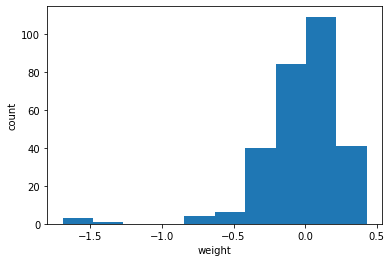

In [24]:
# 가중치의 분포 히스토그램

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1)) # 히스토그램을 그리기 위해서는 1차원 배열로 전달해야 함
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

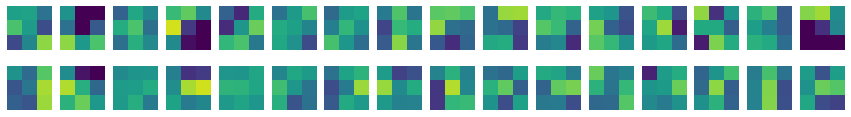

In [26]:
# 커널 출력 - 밝은 부분의 값이 높음, 활성화 증대

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
    for j in range(16) :
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")
plt.show()

In [29]:
# 훈련하지 않은 가중치

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [30]:
# 모델의 첫번째 층(=Conv2D층)의 가중치

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [31]:
# 모델 가중치의 평균과 표준편차

no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(-0.0064970157, 0.0811125)

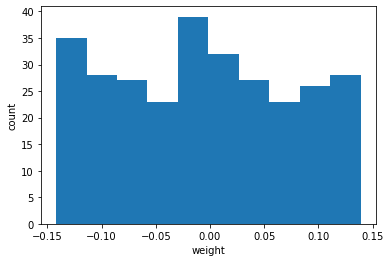

In [32]:
# 가중치 히스토그램

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show() # 텐서플로가 신경망의 가중치를 처음 초기화 할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

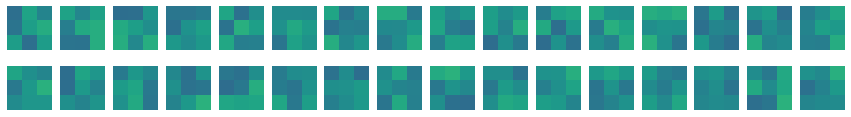

In [33]:
# 학습하지 않은 모델 가중치 그림으로 출력

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
    for j in range(16) :
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")
plt.show()

##### 2) 함수형 API & 특성 맵 시각화 #####

In [37]:
conv_acti = keras.Model(model.input, model.layers[0].output)

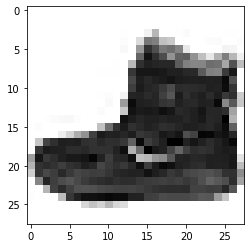

In [39]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [40]:
# 데이터 전처리

inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [41]:
feature_maps.shape

(1, 28, 28, 32)

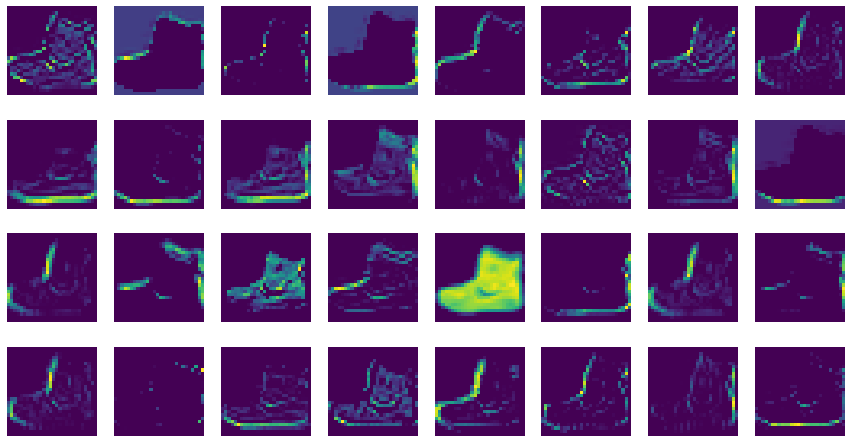

In [43]:
# 특성맵 그리기 - 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분

fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4) :
    for j in range(8) :
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")
plt.show()

In [46]:
# 두번재 합성곱 층의 특성 맵

conv2_acti = keras.Model(model.input, model.layers[2].output)

inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [48]:
feature_maps.shape

(1, 14, 14, 64)

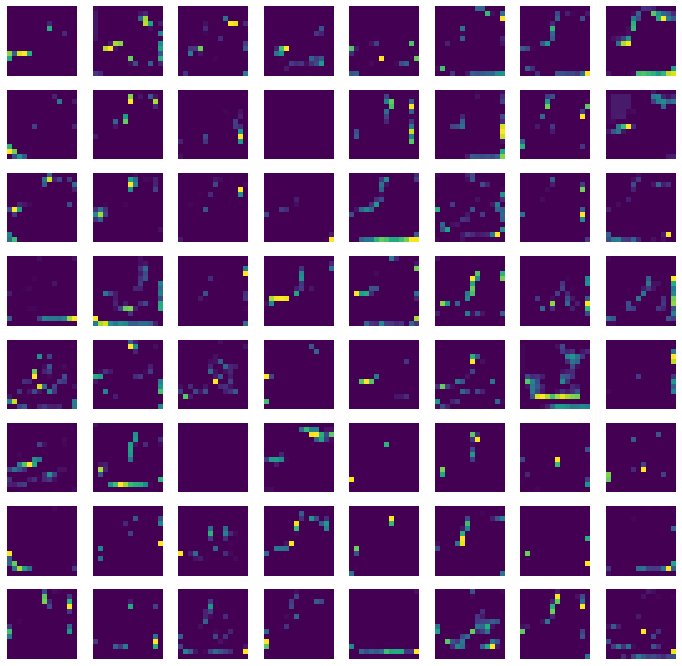

In [49]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8) :
    for j in range(8) :
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")
plt.show()